In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Import data
# from google.colab import files
# uploaded = files.upload()

In [3]:
baseball_df = pd.read_csv('salary_batting_people_2015.csv')
baseball_df.head()

,uniqueid,yearid,battingyearid,teamid,lgid,playerid,salary,games,bats,runs,...,namelast,namegiven,weight,height,bats_hand,throws_hand,debut,finalgame,retroid,bbrefid
0,2015ARIahmedni01,2015,2014,ARI,NL,ahmedni01,508500,25,70,9,...,Ahmed,Nicholas Mark,201,74,R,R,2014-06-29,2021-09-17,ahmen001,ahmedni01
1,2015ARIanderch01,2015,2014,ARI,NL,anderch01,512500,22,34,0,...,Anderson,Robert Chase,210,73,R,R,2014-05-11,2021-08-04,andec001,anderch01
2,2015ARIchafian01,2015,2014,ARI,NL,chafian01,507500,3,2,0,...,Chafin,Andrew Gregory,235,74,R,L,2014-08-13,2021-09-29,chafa001,chafian01
3,2015ARIcollmjo01,2015,2014,ARI,NL,collmjo01,1400000,33,54,2,...,Collmenter,Joshua Michael,240,75,R,R,2011-04-17,2017-05-24,collj001,collmjo01
4,2015ARIdelgara01,2015,2014,ARI,NL,delgara01,526000,47,9,0,...,Delgado,Randall Enrique,220,76,R,R,2011-06-17,2018-09-28,delgr001,delgara01


In [4]:
# Generate our categorical variable list
baseball_cat = baseball_df.dtypes[baseball_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
baseball_df[baseball_cat].nunique()

uniqueid        593
teamid           30
lgid              2
playerid        593
birthcountry     17
birthstate      107
birthcity       401
deathcountry      2
deathstate        2
deathcity         2
namefirst       319
namelast        523
namegiven       572
bats_hand         3
throws_hand       2
debut           476
finalgame       278
retroid         593
bbrefid         593
dtype: int64

In [5]:
baseball_df.columns

Index(['uniqueid', 'yearid', 'battingyearid', 'teamid', 'lgid', 'playerid',
       'salary', 'games', 'bats', 'runs', 'hits', 'doubles', 'triples',
       'homeruns', 'rbi', 'stolen_bases', 'caught_stealing', 'walks',
       'strike_outs', 'international_walks', 'hit_by_pitch', 'sacrifice_bunt',
       'sacrifice_flies', 'hit_into_double_plays', 'birthyear', 'birthmonth',
       'birthday', 'birthcountry', 'birthstate', 'birthcity', 'deathyear',
       'deathmonth', 'deathday', 'deathcountry', 'deathstate', 'deathcity',
       'namefirst', 'namelast', 'namegiven', 'weight', 'height', 'bats_hand',
       'throws_hand', 'debut', 'finalgame', 'retroid', 'bbrefid'],
      dtype='object')

In [6]:
baseball_df.isnull().values.any()

True

In [7]:
baseball_df.isnull().sum()

uniqueid                   0
yearid                     0
battingyearid              0
teamid                     0
lgid                       0
playerid                   0
salary                     0
games                      0
bats                       0
runs                       0
hits                       0
doubles                    0
triples                    0
homeruns                   0
rbi                        0
stolen_bases               0
caught_stealing            0
walks                      0
strike_outs                0
international_walks        0
hit_by_pitch               0
sacrifice_bunt             0
sacrifice_flies            0
hit_into_double_plays      0
birthyear                  0
birthmonth                 0
birthday                   0
birthcountry               0
birthstate                15
birthcity                  0
deathyear                591
deathmonth               591
deathday                 591
deathcountry             591
deathstate    

In [8]:
# baseball_df = baseball_df[["salary", "games", "runs", "hits"]]
baseball_df = baseball_df[['salary','games','bats','runs','rbi', 'hits', 'doubles', 'triples', 'homeruns', 'walks']]
baseball_df.columns

Index(['salary', 'games', 'bats', 'runs', 'rbi', 'hits', 'doubles', 'triples',
       'homeruns', 'walks'],
      dtype='object')

In [9]:
baseball_df.isnull().sum()

salary      0
games       0
bats        0
runs        0
rbi         0
hits        0
doubles     0
triples     0
homeruns    0
walks       0
dtype: int64

In [10]:
cleaned_baseball_df = baseball_df.dropna()

In [11]:
# Remove salary target from features data
y = cleaned_baseball_df.salary
X = cleaned_baseball_df.drop(columns=["salary"])
# X = baseball_df.columns=("games", "runs", "hits") 


In [12]:
print(y.shape)
print(X.shape)

(593,)
(593, 9)


In [13]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [14]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [15]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

In [16]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# Added from the Module that compared RandomForest with Deep Learning
from sklearn.metrics import accuracy_score
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.027


In [18]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.8873873873873874
Testing Score: 0.026845637583892617


[0.32094345 0.14773651 0.08825641 0.08413309 0.10079765 0.07140907
 0.04125508 0.05731211 0.08815662]


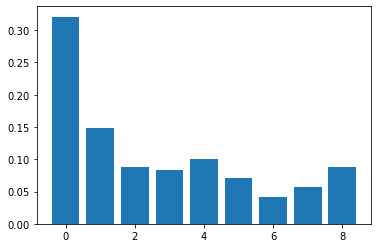

In [19]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [20]:
from sklearn.feature_selection import SelectFromModel

In [21]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True,  True, False, False, False, False, False, False, False])

In [22]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [23]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.08783783783783784
Testing Score: 0.006711409395973154


C:\Users\jerem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.0472972972972973
Testing Score: 0.020134228187919462


In [1]:
# Added from the Module that compared RandomForest with Deep Learning
import tensorflow as tf
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 2512

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

ModuleNotFoundError: No module named 'tensorflow'